In [43]:
import pandas as pd
df=pd.read_csv(r"C:\Users\elabi\OneDrive\Desktop\Assurance maladie\data\raw\assurance-maladie.csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df['age'].count()

np.int64(1338)

In [ ]:
for col in df:
    print(df[col].dtype)

In [12]:
df["age"].mean()

np.float64(39.20702541106129)

In [13]:
df["age"].median()

np.float64(39.0)

In [14]:
df["age"].std()

np.float64(14.049960379216154)

In [15]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df["sex"].value_counts(normalize=True)*100

(sex
 male      50.523169
 female    49.476831
 Name: proportion, dtype: float64,
 '%')

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


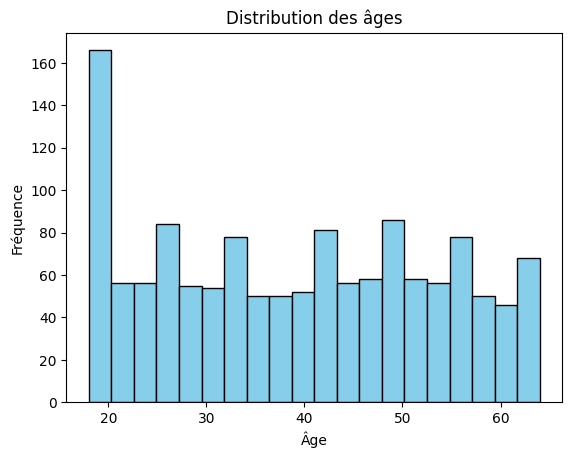

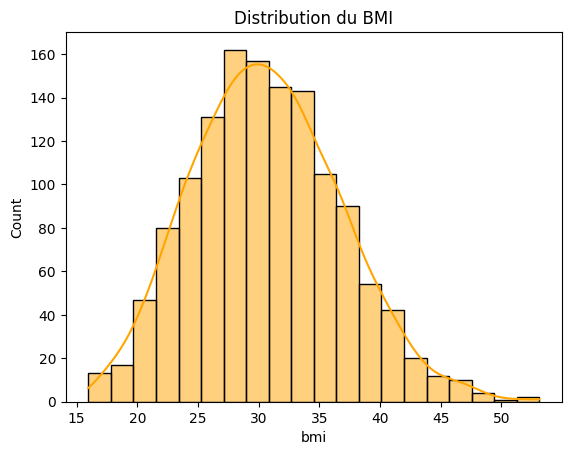

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme avec Matplotlib
plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

sns.histplot(df["bmi"], bins=20, kde=True, color="orange")
plt.title("Distribution du BMI")
plt.show()

C:\Users\elabi\AppData\Local\Temp\ipykernel_38008\2973472846.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="smoker",y="charges",data=df,ci=None,palette="Set2")
C:\Users\elabi\AppData\Local\Temp\ipykernel_38008\2973472846.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="smoker",y="charges",data=df,ci=None,palette="Set2")


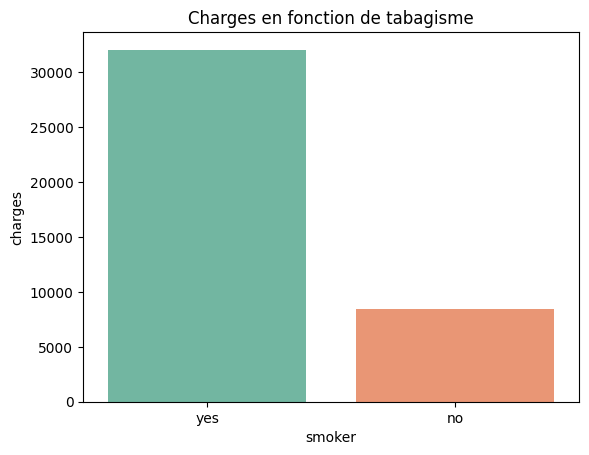

In [5]:
# pairplots ou heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="smoker",y="charges",data=df,ci=None,palette="Set2")
plt.title("Charges en fonction de tabagisme")
plt.show()

C:\Users\elabi\AppData\Local\Temp\ipykernel_38008\3585345407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoker", y="bmi", data=df, palette="Set2")


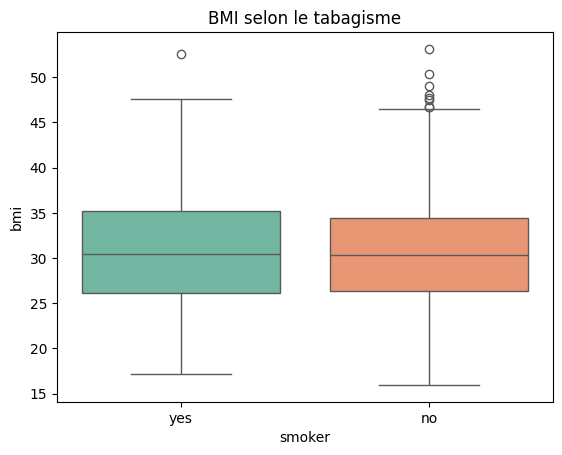

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="smoker", y="bmi", data=df, palette="Set2")
plt.title("BMI selon le tabagisme")
plt.show()


C:\Users\elabi\AppData\Local\Temp\ipykernel_38008\723134786.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="children",y="charges",data=df,ci=None,palette="Set2")
C:\Users\elabi\AppData\Local\Temp\ipykernel_38008\723134786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="children",y="charges",data=df,ci=None,palette="Set2")


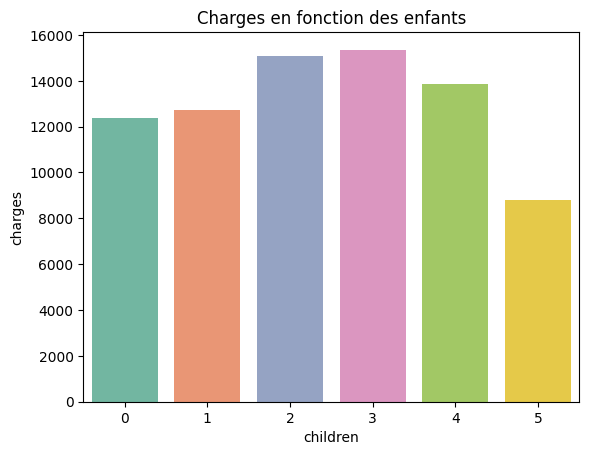

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="children",y="charges",data=df,ci=None,palette="Set2")
plt.title("Charges en fonction des enfants")
plt.show()

Matrice de corrélation :
                age       bmi  children    smoker   charges
age       1.000000  0.109272  0.042469 -0.025019  0.299008
bmi       0.109272  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.198341  0.067998  0.787251  1.000000


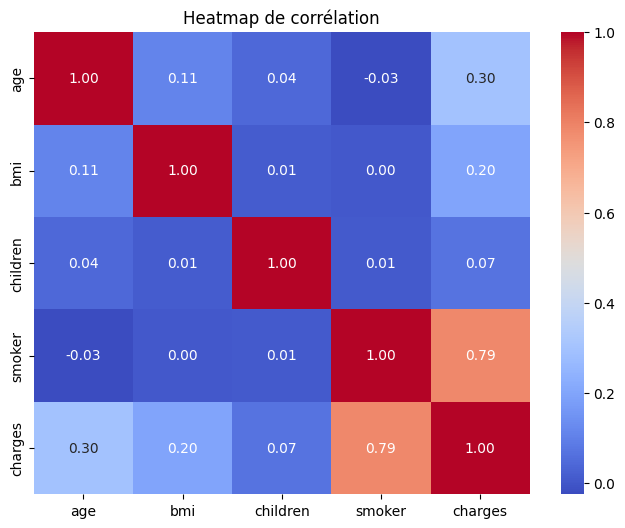

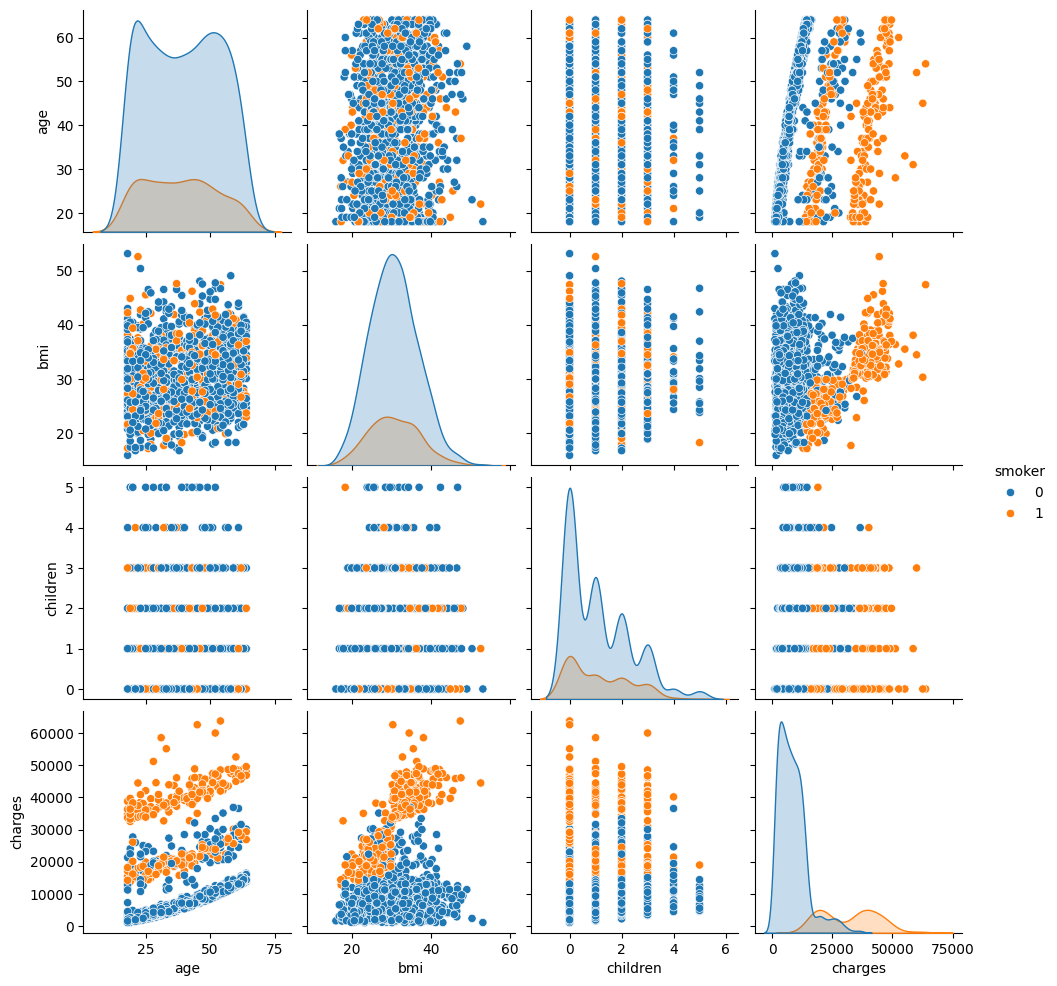

In [21]:
df_numeric = df.copy()
df_numeric['smoker'] = df_numeric['smoker'].map({'no':0, 'yes':1})

numeric_cols = df_numeric.select_dtypes(include='number')

corr_matrix = numeric_cols.corr()
print("Matrice de corrélation :\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap de corrélation")
plt.show()

sns.pairplot(df_numeric, hue='smoker') 
plt.show()


In [10]:
import numpy as np

num_col = df.select_dtypes(include=np.number).columns
print(df.isna().sum())

for col in num_col:
    median = df[col].median()
    df[col] = df[col].fillna(median)
print(df.isna().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
cat_cols = df.select_dtypes(include='object').columns
print(df[cat_cols].isna().sum())
for col in cat_cols:
    mode = df[col].mode()[0] 
    df[col] = df[col].fillna(mode)  
print(df[cat_cols].isna().sum())



sex       0
smoker    0
region    0
dtype: int64


In [12]:
print("Doublons avant suppression :")
print(df[df.duplicated()])

Doublons avant suppression :
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [13]:
df = df.drop_duplicates()
print("Doublons Supprimé")

Doublons Supprimé


In [14]:
print("\nDoublons après suppression :")
print(df[df.duplicated()])



Doublons après suppression :
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


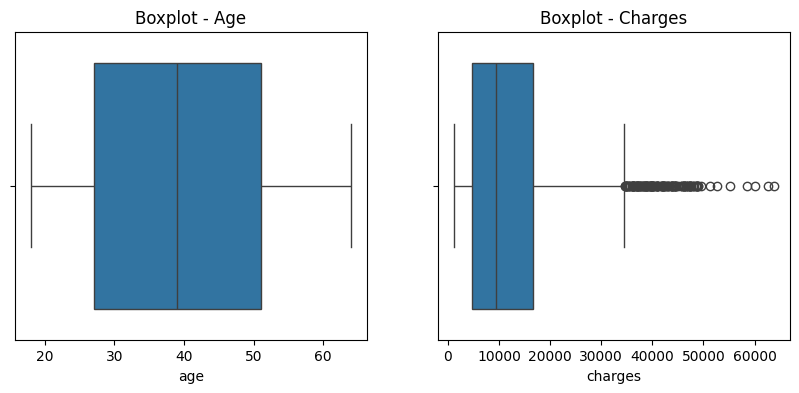


 Outliers détectés avec Z-score (|z| > 3) :
      age     sex     bmi  children smoker     region      charges     z_age  \
34     28    male  36.400         1    yes  southwest  51194.55914 -0.797954   
543    54  female  47.410         0    yes  southeast  63770.42801  1.053277   
577    31  female  38.095         1    yes  northeast  58571.07448 -0.584350   
819    33  female  35.530         0    yes  northwest  55135.40209 -0.441948   
1146   60    male  32.800         0    yes  southwest  52590.82939  1.480485   
1230   52    male  34.485         3    yes  northwest  60021.39897  0.910875   
1300   45    male  30.360         0    yes  southeast  62592.87309  0.412467   

      z_charges  
34     3.132806  
543    4.171663  
577    3.742159  
819    3.458348  
1146   3.248148  
1230   3.861966  
1300   4.074389  
Nombre d'outliers détectés : 7

 Outliers détectés avec IQR :
      age     sex     bmi  children smoker     region      charges     z_age  \
14     27    male  42.130   

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# ---------------------------------------------------------
# 1. Détection avec Boxplot (visualisation)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df["age"])
plt.title("Boxplot - Age")

plt.subplot(1,2,2)
sns.boxplot(x=df["charges"])
plt.title("Boxplot - Charges")

plt.show()

# ---------------------------------------------------------
# 2. Détection avec Z-score

df["z_age"]=zscore(df["age"],ddof=0)
df["z_charges"]=zscore(df["charges"],ddof=0)

outliers_z = df[(df["z_age"].abs() > 3) | (df["z_charges"].abs() > 3)]

print("\n Outliers détectés avec Z-score (|z| > 3) :")

print(outliers_z)
print(f"Nombre d'outliers détectés : {outliers_z.shape[0]}")



# ---------------------------------------------------------
# 3. Détection avec IQR

Q1_age = df["age"].quantile(0.25)
Q3_age= df["age"].quantile(0.75)
IQR_age=Q3_age-Q1_age
min_age=Q1_age - 1.5 * IQR_age
max_age=Q3_age + 1.5 * IQR_age


Q1_c = df["charges"].quantile(0.25)
Q3_c= df["charges"].quantile(0.75)
IQR_c=Q3_c-Q1_c
min_c=Q1_c - 1.5 * IQR_c
max_c=Q3_c + 1.5 * IQR_c
outliers_iqr = df[(df["age"] < min_age) | (df["age"] > max_age) |
                  (df["charges"] < min_c) | (df["charges"] > max_c)]

print("\n Outliers détectés avec IQR :")
print(outliers_iqr)




In [ ]:
# Sélection des outliers
outliers_z = df[(df["z_age"].abs() > 3) | (df["z_charges"].abs() > 3)]

# --- garder le DataFrame original et créer un log 
outliers_z.to_csv("log_outliers.csv", index=False)
print("Log des outliers sauvegardé dans 'log_outliers.csv'")
print(f"Nombre d'outliers détectés : {outliers_z.shape[0]}")


# garder le DataFrame original et créer un log pour IQR
outliers_iqr.to_csv("log_outliers_iqr.csv", index=False)

print("\n--- Outliers enregistrés dans le log ---")

print(f"\nNombre d'outliers détectés : {outliers_iqr.shape[0]}")


Log des outliers sauvegardé dans 'log_outliers.csv'
Nombre d'outliers détectés : 7

--- Outliers enregistrés dans le log ---

Nombre d'outliers détectés : 139


In [44]:
import pandas as pd

# Encodage Label Encoding pour sex et smoker
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

# Encodage One-Hot Encoding pour region
df = pd.get_dummies(df, columns=["region"], prefix="region") 

print(df.head())


   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061             False   
4   32    0  28.880         0       0   3866.85520             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [45]:
from sklearn.model_selection import train_test_split

# 1. Séparer les features (X) et la cible (y)
X = df.drop("charges", axis=1)  # toutes les colonnes sauf charges
y = df["charges"]               # la variable qu’on veut prédire

# 2. Diviser en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille X_train :", X_train.shape)
print("Taille X_test :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test :", y_test.shape)


Taille X_train : (1070, 9)
Taille X_test : (268, 9)
Taille y_train : (1070,)
Taille y_test : (268,)


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choisir les colonnes numériques
num_cols = ["age", "bmi", "children", "charges"]

# 1️ Standardisation
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])

# 2️ OU Normalisation
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df.head())

        age  sex       bmi  children  smoker   charges  region_northeast  \
0  0.021739    1  0.321227       0.0       1  0.251611             False   
1  0.000000    0  0.479150       0.2       0  0.009636             False   
2  0.217391    0  0.458434       0.6       0  0.053115             False   
3  0.326087    0  0.181464       0.0       0  0.333010             False   
4  0.304348    0  0.347592       0.0       0  0.043816             False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  
